# CBE-162 Fall 2024 Lab 3- Non Linear Systems
Outline:
* Solving for a harmonic oscillator
* Solving a non linear system
  




## Imports

In [3]:

# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp

## Problem 1: Coupled Oscillators

A set of two spring coupled masses are oscillating as shown below.
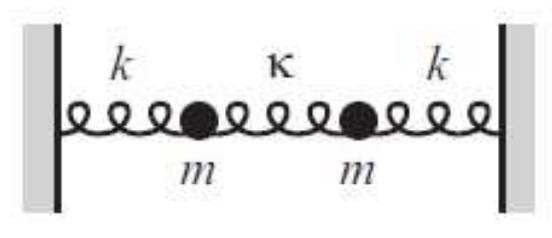

This system is described by the following set of ODEs $m$ represents the mass of the point objects, $k$ and $κ$ are spring constants as shown, and $x_1$ and $x_2$ represent positions for the respective point masses.
\begin{align}
m \ddot{x}_1 &= -(k+\kappa) x_1 + \kappa x_2,
\\
m \ddot{x}_2 &= -(k+\kappa) x_2 + \kappa x_1.
\end{align}

(i) Solve the system of ordinary differential equations


In [5]:
# Parameters
m = 1
k = 4
kappa = 0.5
y0 = [1, 0, 0, 0]

In [11]:
def oscillators(t, y, m, k, kappa):
    x1, v1, x2, v2 = y #ICs
    dx1dt = v1
    dv1dt = -(kappa + k) * x1 + kappa * x2
    dx2dt = v2
    dv2dt = -(kappa + k) * x2 + kappa * x1
    return [dx1dt, dv1dt, dx2dt, dv2dt]

t_span = (0, 100)
t_eval = np.linspace(0, 10, 1000)

sol = solve_ivp(oscillators, t_span, y0, args=(m, k, kappa), t_eval=t_eval)

(ii) plot $x_1$ , $x_2$ and $x_1 + x_2$ as a function of time. simulate the same until t=50s

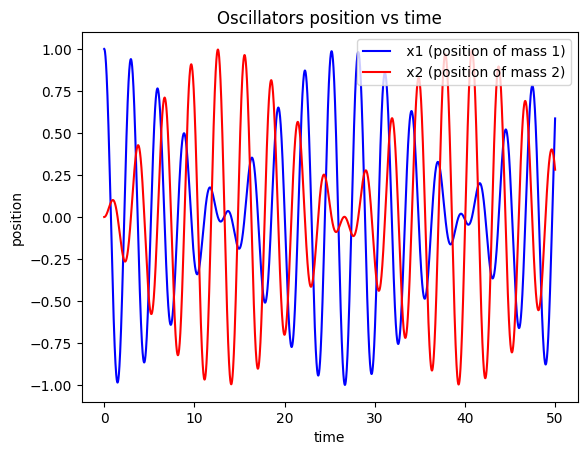

In [14]:
t_span = (0, 50)
t_eval = np.linspace(0, 50, 5000)

sol = solve_ivp(oscillators, t_span, y0, args=(m, k, kappa), t_eval=t_eval)


plt.plot(sol.t, sol.y[0], label=" x1 (position of mass 1)", color="blue")
plt.plot(sol.t, sol.y[2], label =" x2 (position of mass 2)", color="red")
plt.xlabel('time')
plt.ylabel('position')
plt.legend()
plt.title('Oscillators position vs time')
plt.show()

#  Problem 2: Non Linear Systems

Consider a well-mixed stirred tank reactor, using water as a solvent. An inlet stream $F_{in}$ enters the reactor at $T_{in}$ . The inlet stream contains a reactant A, with concentration $C_{a0}$. Within this reactor, A reacts to form product B:

$$A→B$$

This reaction is exothermic, with heat of reaction $ΔH_r$. It has a rate constant $k$. The rate constant has an Arrhenius dependency on temperature, with activation Energy $E_a$.

The reactor has an outlet such that the outflow $F_{out}$ is proportional to the square root of height in the tank $h$.The proportionality constant for which is $\alpha$.

The temperature in the tank is initially at  $T_o$. The tank is cooled externally through a jacket. The jacket cooling rate is $U A_s (T-T_j)$ where $T_j$ is the jacket temperature. Assume $U$ to be constant.

The system is at a temperature $T_1=55^oC$. The system is allowed to reach steady state over the next t=200s. Frame differential equations for concentrations of A and B and height of fluid in the tank, as well as Temperature. Find the steady state values for the aforementioned variables by simulating over the specified time.





In [28]:
Fin= 100 #lit/s
T_in=25 #Celsius
Ca_0=1 #M
h_0=2 #m
delH=116.3 #kJ/mol
dH_r = delH * 1e3 #J/mol
Arr=7.912*1e23# pre exponential factor, second inverse
Ea=150 #kJ/mol
alpha=70.710
Area=1 #m2
U=805.33 #W/m2 C
As=2.5 #m2
Tj=25 #C
Cp=75 #J/mol K
rho=1e3/18 # mol/lit
T1=55#Celsius
R=8.31447


In [93]:
T_in_K = T_in + 273.15
Tj_K = Tj + 273.15
T1_K = T1 + 273.15

def rate_expression(T):
    T_K = T + 273.15
    return Arr * np.exp(-Ea / (R * T_K))

def odes(t, y):
    Ca, Cb, h, T = y
    rate = rate_expression(T)

    F_out = alpha * np.sqrt(h)

    dCa_dt = (Fin / (Area * h)) * (Ca_0 - Ca) - rate * Ca
    dCb_dt = rate * Ca - (F_out / (Area * h)) * Cb
    dh_dt = (Fin - F_out) / Area
    dT_dt = (Fin / (Area * h)) * (T_in - T) - (dH_r / (rho * Cp)) * rate * Ca + (U * As / (Area * h * Cp)) * (Tj - T)

    return [dCa_dt, dCb_dt, dh_dt, dT_dt]

y0 = [Ca_0, 0, h_0, T1]

t_span = (0, 1000)
t_eval = np.linspace(0, 200, 10)
sol = solve_ivp(odes, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-3, atol=1e-6)

print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.222e+01  4.444e+01  6.667e+01  8.889e+01
             1.111e+02  1.333e+02  1.556e+02  1.778e+02  2.000e+02]
        y: [[ 1.000e+00  9.999e-01 ...  9.999e-01  9.999e-01]
            [ 0.000e+00  8.300e-05 ...  8.333e-05  8.351e-05]
            [ 2.000e+00  2.000e+00 ...  2.000e+00  2.000e+00]
            [ 5.500e+01  2.500e+01 ...  2.500e+01  2.499e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 124934
     njev: 0
      nlu: 0


/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_17706/3215180036.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


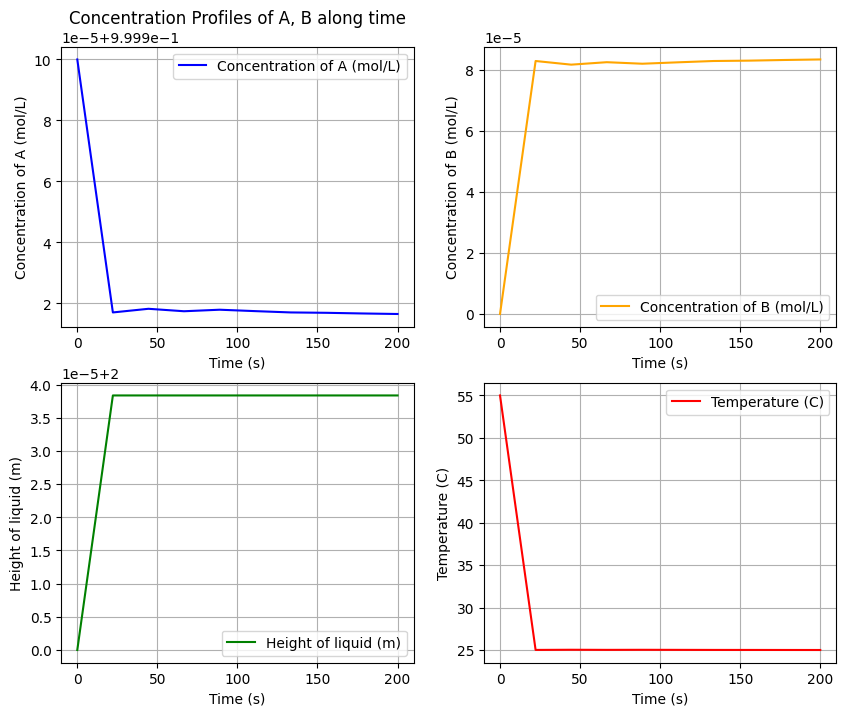

In [94]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Concentration Profiles of A, B along time')
plt.plot(sol.t, sol.y[0], label='Concentration of A (mol/L)', color='blue')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration of A (mol/L)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1], label='Concentration of B (mol/L)', color='orange')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration of B (mol/L)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.legend()
plt.plot(sol.t, sol.y[2], label='Height of liquid (m)', color='green')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Height of liquid (m)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label='Temperature (C)', color='red')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.grid(True)

plt.show()


2.2 Now, we perturb this steady state at t=0 by increasing the inlet flow by 10%. Plot the dynamic behaviour of height of fluid in the tank against time. Do the same for concentrations of A and B, as well as for Temperature in the reactor. Simulate till t=200s.

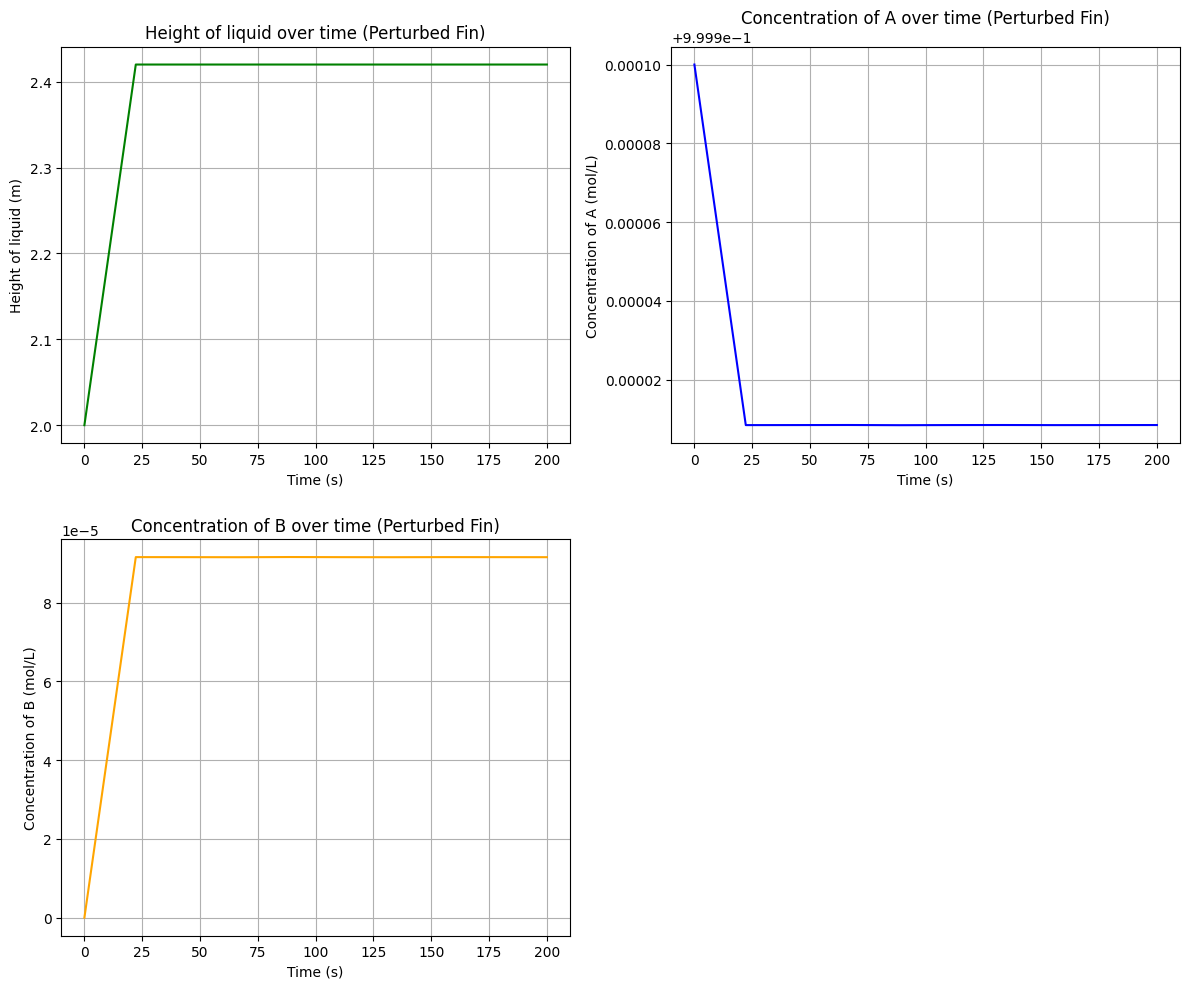

In [100]:
Fin = 1.10 * Fin

y0 = [Ca_0, 0, h_0, T1]
t_span = (0, 1000)
t_eval = np.linspace(0, 200, 10)
sol = solve_ivp(odes, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-5, atol=1e-6)

# plot
plt.figure(figsize=(12, 10))
# Height
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[2], label='Height of liquid (m)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Height of liquid (m)')
plt.title('Height of liquid over time (Perturbed Fin)')
plt.grid(True)

# Concentration A
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[0], label='Concentration of A (mol/L)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Concentration of A (mol/L)')
plt.title('Concentration of A over time (Perturbed Fin)')
plt.grid(True)

# Concentration B
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[1], label='Concentration of B (mol/L)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Concentration of B (mol/L)')
plt.title('Concentration of B over time (Perturbed Fin)')
plt.grid(True)

plt.tight_layout()
plt.show()



2.3 Consider the steady state in 2.1. Instead of changing the inlet flow at t=0, we instead perturb Temperature $T$ in the tank and reduce it to $T=38^0C$ at time t=0. Now, plot concentration of A, and B against time. Plot the Temperature of the fluid $T$ in the tank against time as well. Simulate the same until t=1000s. Write yur observation as a comment at the end of your code

In [101]:
Fin = Fin / 1.10
T1 = 38

y0 = [Ca_0, 0, h_0, T1]

t_span = (0, 1000)
t_eval = np.linspace(0, 1000, 1000)

sol = solve_ivp(odes, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-5, atol=1e-8)


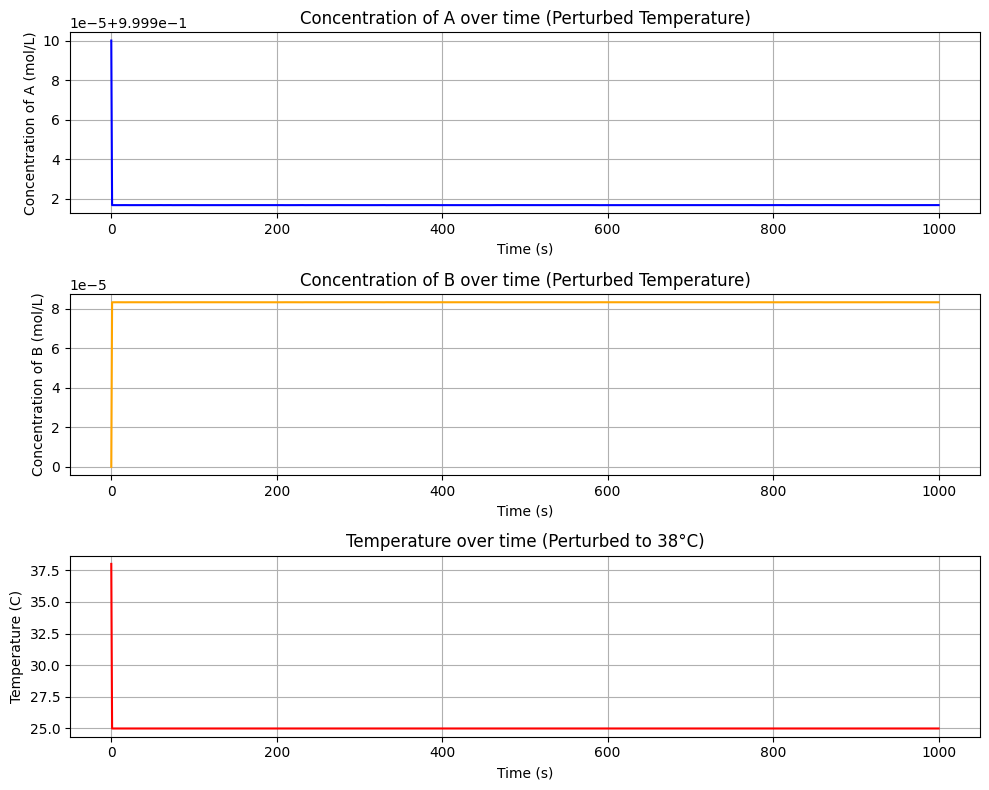

In [105]:
#  Concentration of A over time
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(sol.t, sol.y[0], label='Concentration of A (mol/L)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Concentration of A (mol/L)')
plt.title('Concentration of A over time (Perturbed Temperature)')
plt.grid(True)

# Concentration of B over time
plt.subplot(3, 1, 2)
plt.plot(sol.t, sol.y[1], label='Concentration of B (mol/L)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Concentration of B (mol/L)')
plt.title('Concentration of B over time (Perturbed Temperature)')
plt.grid(True)

# Temperature over time
plt.subplot(3, 1, 3)
plt.plot(sol.t, sol.y[3], label='Temperature (C)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.title('Temperature over time (Perturbed to 38°C)')
plt.grid(True)

plt.tight_layout()
plt.show()